In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import warnings

In [11]:
data = pd.read_excel('mathscore.xlsx')
data

,Gender,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,EthnicGroup,ReadingScore,WritingScore
0,female,bachelor's degree,married,regularly,yes,3.0,< 5,71,NaN,71,74
1,female,some college,married,sometimes,yes,0.0,2024-05-10 00:00:00,69,group C,90,88
2,female,master's degree,single,sometimes,yes,4.0,< 5,87,group B,93,91
3,male,associate's degree,married,never,no,1.0,2024-05-10 00:00:00,45,group A,56,42
4,male,some college,married,sometimes,yes,0.0,2024-05-10 00:00:00,76,group C,78,75
...,...,...,...,...,...,...,...,...,...,...,...
30636,female,high school,single,sometimes,no,2.0,2024-05-10 00:00:00,59,group D,61,65
30637,male,high school,single,regularly,no,1.0,2024-05-10 00:00:00,58,group E,53,51
30638,female,high school,married,sometimes,no,1.0,2024-05-10 00:00:00,61,NaN,70,67
30639,female,associate's degree,married,regularly,no,3.0,2024-05-10 00:00:00,82,group D,90,93


In [12]:
data.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   ParentEduc           28796 non-null  object 
 2   ParentMaritalStatus  29451 non-null  object 
 3   PracticeSport        30010 non-null  object 
 4   IsFirstChild         29737 non-null  object 
 5   NrSiblings           29069 non-null  float64
 6   WklyStudyHours       29686 non-null  object 
 7   MathScore            30641 non-null  int64  
 8   EthnicGroup          28801 non-null  object 
 9   ReadingScore         30641 non-null  int64  
 10  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.6+ MB


In [14]:
data.isna().sum()

Gender                    0
ParentEduc             1845
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
WklyStudyHours          955
MathScore                 0
EthnicGroup            1840
ReadingScore              0
WritingScore              0
dtype: int64

In [15]:
# Assuming 'EthnicGroup' is the column containing group labels
ethnic_mapping = {
    'group A': 2,
    'group B': 3,
    'group C': 4,
    'group D': 5,
    'group E': 6
}

# Replace the generic group labels with ethnic descriptions
data['EthnicGroup'].replace(ethnic_mapping, inplace=True)
data

,Gender,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,EthnicGroup,ReadingScore,WritingScore
0,female,bachelor's degree,married,regularly,yes,3.0,< 5,71,NaN,71,74
1,female,some college,married,sometimes,yes,0.0,2024-05-10 00:00:00,69,4.0,90,88
2,female,master's degree,single,sometimes,yes,4.0,< 5,87,3.0,93,91
3,male,associate's degree,married,never,no,1.0,2024-05-10 00:00:00,45,2.0,56,42
4,male,some college,married,sometimes,yes,0.0,2024-05-10 00:00:00,76,4.0,78,75
...,...,...,...,...,...,...,...,...,...,...,...
30636,female,high school,single,sometimes,no,2.0,2024-05-10 00:00:00,59,5.0,61,65
30637,male,high school,single,regularly,no,1.0,2024-05-10 00:00:00,58,6.0,53,51
30638,female,high school,married,sometimes,no,1.0,2024-05-10 00:00:00,61,NaN,70,67
30639,female,associate's degree,married,regularly,no,3.0,2024-05-10 00:00:00,82,5.0,90,93


In [16]:
# fill the missing values for 'EthicGroup' column by the most frequent value
dt = data['EthnicGroup'].mode()[0]
data['EthnicGroup'].fillna(dt ,inplace= True)


# fill the missing values for 'ParentEduc' column by the common degree they have
dt = data['ParentEduc'].mode()[0]
data['ParentEduc'].fillna(dt , inplace =True)


# fill the missing values for 'ParentMaritalStatus' column by the single status
data['ParentMaritalStatus'].fillna('single' , inplace = True)


# fill the missing values for 'PracticeSport' column by the most common status
mode = data['PracticeSport'].mode()[0]
data['PracticeSport'].fillna(mode , inplace = True)


# fill the missing calues for 'NrSiblings' column by average number of siblings the student have
avg_siblings = data['NrSiblings'].mean()
data['NrSiblings'].fillna(avg_siblings , inplace = True)


# fill the missing calues for 'WklyStudyHours' column by average number of siblings the student have
avg_hours = data['WklyStudyHours'].mode()[0]
data['WklyStudyHours'].fillna(avg_hours , inplace = True)


avg_IsFirstChild = data['IsFirstChild'].mode()[0]
data['IsFirstChild'].fillna(avg_IsFirstChild , inplace = True)

data

,Gender,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,EthnicGroup,ReadingScore,WritingScore
0,female,bachelor's degree,married,regularly,yes,3.0,< 5,71,4.0,71,74
1,female,some college,married,sometimes,yes,0.0,2024-05-10 00:00:00,69,4.0,90,88
2,female,master's degree,single,sometimes,yes,4.0,< 5,87,3.0,93,91
3,male,associate's degree,married,never,no,1.0,2024-05-10 00:00:00,45,2.0,56,42
4,male,some college,married,sometimes,yes,0.0,2024-05-10 00:00:00,76,4.0,78,75
...,...,...,...,...,...,...,...,...,...,...,...
30636,female,high school,single,sometimes,no,2.0,2024-05-10 00:00:00,59,5.0,61,65
30637,male,high school,single,regularly,no,1.0,2024-05-10 00:00:00,58,6.0,53,51
30638,female,high school,married,sometimes,no,1.0,2024-05-10 00:00:00,61,4.0,70,67
30639,female,associate's degree,married,regularly,no,3.0,2024-05-10 00:00:00,82,5.0,90,93


In [17]:
data["WklyStudyHours"] = data["WklyStudyHours"].str.replace("2024-05-10","5-10")
data["WklyStudyHours"] = data["WklyStudyHours"].fillna("5-10")
#data

In [18]:
data = pd.DataFrame(data)
data['MathScore'] = data['MathScore']/5
data['ReadingScore'] = data['ReadingScore']/5
data['WritingScore'] = data['WritingScore']/5

In [19]:
data

,Gender,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,EthnicGroup,ReadingScore,WritingScore
0,female,bachelor's degree,married,regularly,yes,3.0,< 5,14.2,4.0,14.2,14.8
1,female,some college,married,sometimes,yes,0.0,5-10,13.8,4.0,18.0,17.6
2,female,master's degree,single,sometimes,yes,4.0,< 5,17.4,3.0,18.6,18.2
3,male,associate's degree,married,never,no,1.0,5-10,9.0,2.0,11.2,8.4
4,male,some college,married,sometimes,yes,0.0,5-10,15.2,4.0,15.6,15.0
...,...,...,...,...,...,...,...,...,...,...,...
30636,female,high school,single,sometimes,no,2.0,5-10,11.8,5.0,12.2,13.0
30637,male,high school,single,regularly,no,1.0,5-10,11.6,6.0,10.6,10.2
30638,female,high school,married,sometimes,no,1.0,5-10,12.2,4.0,14.0,13.4
30639,female,associate's degree,married,regularly,no,3.0,5-10,16.4,5.0,18.0,18.6


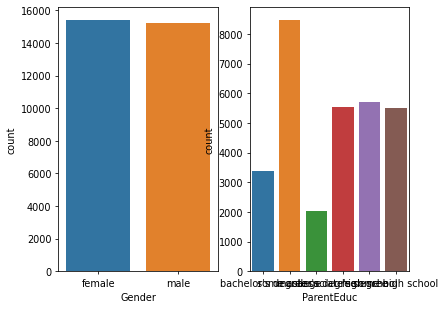

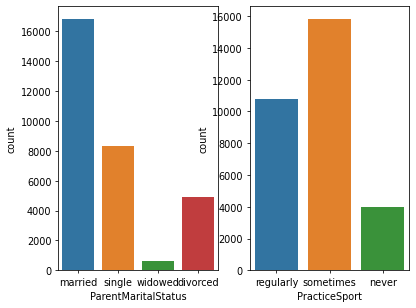

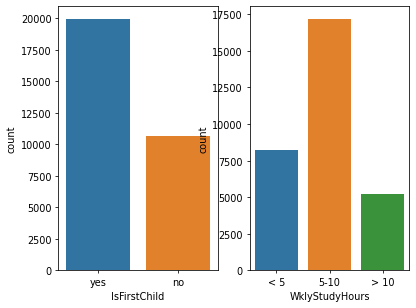

In [20]:
categorical = ['Gender','ParentEduc','ParentMaritalStatus','PracticeSport', 'IsFirstChild', 'WklyStudyHours']
i=0
while i<6:
    fig = plt.figure(figsize= (10,5),dpi= 70)
    fig.tight_layout()
    
    plt.subplot(1,3,1)
    sns.countplot(x= categorical[i], data= data)
    i+=1
   
    plt.subplot(1,3,2)
    sns.countplot(x= categorical[i], data= data)
    i+=1
    
    plt.show

In [21]:
data['Gender']=data['Gender'].map({'female':2,'male':3})

data['IsFirstChild']=data['IsFirstChild'].map({'no':2,'yes':3})

#data

In [22]:
data['ParentMaritalStatus']=data['ParentMaritalStatus'].map({'married':2, 'single':3, 'widowed':4, 'divorced':5})

data['ParentEduc']=data['ParentEduc'].map({"bachelor's degree":2, "master's degree":3, "associate's degree":4, "some college":5, "high school":6, "some high school":7})

#data

In [23]:
#data['WklyStudyHours'].unique()

In [24]:
data['PracticeSport']=data['PracticeSport'].map({'regularly':2,'sometimes':3,'never':4})
data['WklyStudyHours']=data['WklyStudyHours'].map({'< 5':2,'5-10':3,'> 10':4})
data

,Gender,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,EthnicGroup,ReadingScore,WritingScore
0,2,2,2,2,3,3.0,2,14.2,4.0,14.2,14.8
1,2,5,2,3,3,0.0,3,13.8,4.0,18.0,17.6
2,2,3,3,3,3,4.0,2,17.4,3.0,18.6,18.2
3,3,4,2,4,2,1.0,3,9.0,2.0,11.2,8.4
4,3,5,2,3,3,0.0,3,15.2,4.0,15.6,15.0
...,...,...,...,...,...,...,...,...,...,...,...
30636,2,6,3,3,2,2.0,3,11.8,5.0,12.2,13.0
30637,3,6,3,2,2,1.0,3,11.6,6.0,10.6,10.2
30638,2,6,2,3,2,1.0,3,12.2,4.0,14.0,13.4
30639,2,4,2,2,2,3.0,3,16.4,5.0,18.0,18.6


In [25]:
#data.corr()

In [26]:
#training model

In [27]:
x = data[['Gender','ParentEduc','ParentMaritalStatus','PracticeSport','IsFirstChild',
          'NrSiblings','WklyStudyHours','EthnicGroup','ReadingScore','WritingScore']]
y = data[['MathScore']].values.reshape(-1,1)
#x.isna().sum()

In [28]:
#x = pd.DataFrame(MinMaxScaler().fit(x).transform(x), columns=(['Gender','ParentEduc','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','WklyStudyHours','EthnicGroup','ReadingScore','WritingScore']))
#y = pd.DataFrame(MinMaxScaler().fit(y).transform(y), columns=(['MathScore']))

In [29]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (24512, 10)
y_train shape:  (24512, 1)
x_test shape: (6129, 10)
y_test shape:  (6129, 1)


In [30]:
i=2
best_result=1
while i<11:
    k_fold = KFold(i)
    results = cross_val_score(model, x, y, cv = k_fold)
    z = np.mean(results)
    if z<best_result :
        best_result=z
        i+=1
    else:
        i+=1
print(results)
print(best_result)

[0.84250341 0.84231173 0.83671787 0.84397551 0.83596499 0.8343917
 0.84928237 0.84690527 0.84617374 0.83764027]
0.8415866852511888


In [31]:
model.fit(x_train,y_train)
print('Intercept: ',model.intercept_)
print('Weights: ',model.coef_)

Intercept:  [-7.28181762]
Weights:  [[ 2.53743521e+00  3.51111622e-02  2.67147739e-03 -1.13428079e-01
   1.04441723e-02  1.98457188e-03  1.73893404e-01  2.07976356e-01
   3.80103733e-01  5.63869788e-01]]


In [32]:
y_pred = model.predict(x_test)

In [33]:
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score: ',metrics.r2_score(y_test,y_pred))
#print(x)

MSE:  1.4867734392570735
RMSE:  1.2193331945194774
MAE:  0.9744941237546437
R2 score:  0.8423310386334251


In [34]:
w0 = 0
weights=[]
def check(Dimension, testsize):
    r2= 0.8423310386334251
    for column in x:
        new_col_name = column + str(Dimension)
        new_col_value = x[column]**Dimension
        x.insert(0,new_col_name,new_col_value)
        X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=testsize, random_state=0)
        new_model= LinearRegression()
        new_model.fit(X_train,Y_train)
        Y_pred= new_model.predict(X_test)
        r2_new= metrics.r2_score(Y_test,Y_pred)
        if r2_new<r2 :
            x.drop([new_col_name], axis=1, inplace=True)
        else:
            r2= r2_new
            w0 = new_model.intercept_
            weights = new_model.coef_
    print('r2 score: ',r2)
    print('intercept: ',w0)
    print('coef: ',weights)
check(2,0.2)

r2 score:  0.8471927707241611
intercept:  [-5.28171398]
coef:  [[ 1.45698259e-01  1.57803307e-03 -4.15686388e-02 -3.19992133e-03
   2.53717785e+00  6.41129304e-02  1.00250871e-03  1.25774716e-01
   3.15606613e-04  1.39269024e-03  1.71745904e-01 -9.93689152e-01
   3.65143692e-01  5.75012093e-01]]


C:\Users\SETUP CO\AppData\Local\Temp\ipykernel_21400\1320036932.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop([new_col_name], axis=1, inplace=True)


In [35]:
print(x)

       EthnicGroup2  IsFirstChild2  PracticeSport2  ParentEduc2  Gender  \
0              16.0              9               4            4       2   
1              16.0              9               9           25       2   
2               9.0              9               9            9       2   
3               4.0              4              16           16       3   
4              16.0              9               9           25       3   
...             ...            ...             ...          ...     ...   
30636          25.0              4               9           36       2   
30637          36.0              4               4           36       3   
30638          16.0              4               9           36       2   
30639          25.0              4               4           16       2   
30640           9.0              4              16           25       3   

       ParentEduc  ParentMaritalStatus  PracticeSport  IsFirstChild  \
0               2           

In [36]:
dt_x = data[['Gender','ParentEduc','PracticeSport','IsFirstChild','WklyStudyHours','EthnicGroup','ReadingScore','WritingScore']]
dt_y = data[['MathScore']].values.reshape(-1,1)
xtrain,xtest,ytrain,ytest=train_test_split(dt_x,dt_y,test_size=0.2,random_state=0)
model.fit(xtrain,ytrain)
y_predict = model.predict(xtest)
print(metrics.r2_score(ytest,y_predict))
print('Intercept: ',model.intercept_)
print('Weights: ',model.coef_)

0.8423235438587222
Intercept:  [-7.26822746]
Weights:  [[ 2.5373409   0.03510895 -0.11339902  0.00976529  0.17391151  0.20798615
   0.38012762  0.56384625]]


In [37]:
i=2
best_result=1
while i<11:
    k_fold = KFold(i)
    results = cross_val_score(model, x, y, cv = k_fold)
    z = np.mean(results)
    if z<best_result :
        best_result=z
        best_k = i
        i+=1
    else:
        i+=1
print(i)
print(results)
print(best_result)

11
[0.84585573 0.84794451 0.8427198  0.8508483  0.83934068 0.840677
 0.85350536 0.85022391 0.84958949 0.84142875]
0.8462133530539188


In [38]:
df1 = pd.DataFrame({'y_test': y_test.flatten(),
                   'y_pred':y_pred.flatten()})
#df1

In [39]:
#plt.figure(figsize=(10,8), dpi=60)
#plt.scatter(y_test,y_pred)

In [41]:
def mathscore():
    EthnicGroup = int(input('''please enter your EthnicGroup ----> A: European students,B: Asian students,
                    C: African students, D: Hispanic/Latino students, E: Middle Eastern students,
    group A: 2,
    group B: 3,
    group C: 4,
    group D: 5,
    group E: 6
    '''))
    IsFirstChild = int(input('are you first child? ----> Yes:3, No:2 '))
    PracticeSport = int(input('are you practice sport? ----> regularly:2, sometimes:3, never:4'))
    ParentEduc = int(input('what is your parent education? ----> bachelors degree:2, masters degree:3, associates degree:4, some college:5, high school:6, some high school:7 '))
    Gender = int(input('what is your gender? ----> female:2, male:3'))
    ParentMaritalStatus = int(input('how is your parent martial status? ----> married:2, single:3, widowed:4, divorced:5'))
    NrSiblings = int(input('how many brothers and sisters do you have? ----> 1 to 7'))
    WklyStudyHours = int(input('how many hours do you study? ----> < 5:2, 5-10:3, > 10:4'))
    ReadingScore = int(input('what is your reading score? ----> 0 t0 20'))
    WritingScore = int(input('what is your writing score? ----> 0 to 20'))
    math = -5.28171398 + (EthnicGroup*EthnicGroup*0.145698259)+(IsFirstChild*IsFirstChild*0.00157803307) + (PracticeSport*PracticeSport*(-0.0415686388))+(ParentEduc*ParentEduc*(-0.03199921330)) + (Gender*2.53717785) + (ParentEduc*0.0641129304)+(ParentMaritalStatus*0.00100250871)+ (PracticeSport*(-0.00319992133))+(IsFirstChild*(0.000315606613))+(NrSiblings*0.00139269024) + (WklyStudyHours*0.171745904) + (EthnicGroup*(-0.993689152)) + (ReadingScore*0.365143692) + (WritingScore*0.575012093)
    result= print('probably your math score will be: ' +str(math))
mathscore()

please enter your EthnicGroup ----> A: European students,B: Asian students,
                    C: African students, D: Hispanic/Latino students, E: Middle Eastern students,
    group A: 2,
    group B: 3,
    group C: 4,
    group D: 5,
    group E: 6
    3
are you first child? ----> Yes:3, No:2 2
are you practice sport? ----> regularly:2, sometimes:3, never:43
what is your parent education? ----> bachelors degree:2, masters degree:3, associates degree:4, some college:5, high school:6, some high school:7 5
what is your gender? ----> female:2, male:32
how is your parent martial status? ----> married:2, single:3, widowed:4, divorced:52
how many brothers and sisters do you have? ----> 1 to 72
how many hours do you study? ----> < 5:2, 5-10:3, > 10:44
what is your reading score? ----> 0 t0 2019
what is your writing score? ----> 0 to 2018
probably your math score will be: 15.246390582716


In [ ]:
    from tkinter import *  
    base = Tk()  
    base.geometry("500x700")  
    base.title("Math Score Prediction") 
    
    Label(base, text='Math Score Prediction', width=20,font=('bold',20)).place(x=90, y=40) 
      
    lb1= Label(base, text="Enter FullName", width=15, font=("bold",10)).place(x=20, y=120)  
    en1= Entry(base)  
    en1.place(x=200, y=120)  
      
    Label(base, text="Select Gender", width=17, font=("bold",10)).place(x=5, y=160) 
    var = IntVar()  
    Radiobutton(base, text="Male", padx=5,variable=var, value=3).place(x=195, y=160)  
    Radiobutton(base, text="Female", padx =10,variable=var, value=2).place(x=250,y=160)  

    list_of_cntry = ("high school","bachelor's degree", "master's degree","associate's degree", "some college")  
    cv = StringVar()  
    drplist= OptionMenu(base, cv, *list_of_cntry)  
    drplist.config(width=15)  
    cv.set("Parent Education")  
    lb2= Label(base, text="Select Parent Education", width=20,font=("bold",10))  
    lb2.place(x=20,y=200)  
    drplist.place(x=200, y=200)  
   
    ParentMaritalStatus = ("Single","Married", "Divorce","Widowed")  
    cv1 = StringVar()  
    drplist1= OptionMenu(base, cv1, *ParentMaritalStatus)  
    drplist1.config(width=18)  
    cv1.set("Parent Marital Status")  
    lb3= Label(base, text="Select Parent Marital Status", width=25,font=("bold",10))  
    lb3.place(x=13,y=240)  
    drplist1.place(x=220, y=240)  
    
    PracticeSport = ("Regularly","Sometimes", "Never")  
    cv2 = StringVar()  
    drplist2= OptionMenu(base, cv2, *PracticeSport)  
    drplist2.config(width=18)  
    cv2.set("Practice Sport")  
    lb4= Label(base, text="Select Practice Sport", width=20,font=("bold",10))  
    lb4.place(x=15,y=280)  
    drplist2.place(x=200, y=280)
    
    Label(base, text="Is First Child", width=17, font=("bold",10)).place(x=5, y=320) 
    vars = IntVar()  
    Radiobutton(base, text="Yes", padx=5,variable=vars, value=2).place(x=195, y=320)  
    Radiobutton(base, text="No", padx =10,variable=vars, value=3).place(x=250,y=320)  

    lb5= Label(base, text="Nr Siblings", width=12, font=("bold",10)).place(x=20, y=360)  
    en2= Entry(base)  
    en2.place(x=200, y=360) 
    
    ParentMaritalStatus = ("< 5","5-10", "> 10")  
    cv1 = StringVar()  
    drplist1= OptionMenu(base, cv1, *ParentMaritalStatus)  
    drplist1.config(width=18)  
    cv1.set("Weekly Study Hours")  
    lb3= Label(base, text="Select Weekly Study Hours", width=25,font=("bold",10))  
    lb3.place(x=13,y=400)  
    drplist1.place(x=220, y=400) 
    
    EthnicGroup = ("A: European students","B: Asian students", "C: African students", "D: Hispanic/Latino students", "E: Middle Eastern students")  
    cv3 = StringVar()  
    drplist3= OptionMenu(base, cv3, *EthnicGroup)  
    drplist3.config(width=18)  
    cv3.set("Ethnic Group")  
    lb4= Label(base, text="Select Ethnic Group", width=19,font=("bold",10))  
    lb4.place(x=15,y=440)  
    drplist3.place(x=200, y=440)
    
    lb6= Label(base, text="Reading Score", width=14, font=("bold",10)).place(x=20, y=480)  
    en3= Entry(base)  
    en3.place(x=200, y=480) 
    
    
    lb7= Label(base, text="Writing Score", width=14, font=("bold",10)).place(x=20, y=520)  
    en4= Entry(base)  
    en4.place(x=200, y=520) 
    
    def MathScore():
        fullname=en1.get()
        
    
    Button(base, text="Predict", width=10).place(x=200,y=600)  
    base.mainloop()  

In [ ]:
math = -5.28171398 + (['EthnicGroup2']*0.145698259)+(['IsFirstChild2']*0.00157803307) + (['PracticeSport2']*(-0.0415686388))+(['ParentEduc2']*(-0.03199921330)) + (['Gender']*2.53717785) + (['ParentEduc']*0.0641129304)
+(['ParentMaritalStatus']*0.00100250871)+ (['PracticeSport']*(-0.00319992133))+(['IsFirstChild']*(0.000315606613))+(['NrSiblings']*0.00139269024) + (['WklyStudyHours']*0.171745904) + (['EthnicGroup']*(-0.993689152)) + 
(['ReadingScore']*0.365143692) + (['WritingScore']*0.575012093)